In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import pandas_datareader.data as web

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [45]:
## List of symbols to grab
symbols = ['FB','AAPL','GOOGL','AMZN','MSFT']
data = {}
for stock in symbols:
    data[stock] = web.DataReader(stock,'yahoo','2018','2021')['Adj Close']
df_1 = pd.DataFrame(data)#.reset_index()
df_1

,FB,AAPL,GOOGL,AMZN,MSFT
Date,,,,,
2018-01-02,181.419998,41.442081,1073.209961,1189.010010,82.383636
2018-01-03,184.669998,41.434864,1091.520020,1204.199951,82.767044
2018-01-04,184.330002,41.627323,1095.760010,1209.589966,83.495522
2018-01-05,186.850006,42.101261,1110.290039,1229.140015,84.530701
2018-01-08,188.279999,41.944889,1114.209961,1246.869995,84.616966
...,...,...,...,...,...
2020-12-24,267.399994,131.970001,1734.160034,3172.689941,222.750000
2020-12-28,277.000000,136.690002,1773.959961,3283.959961,224.960007
2020-12-29,276.779999,134.869995,1757.760010,3322.000000,224.149994


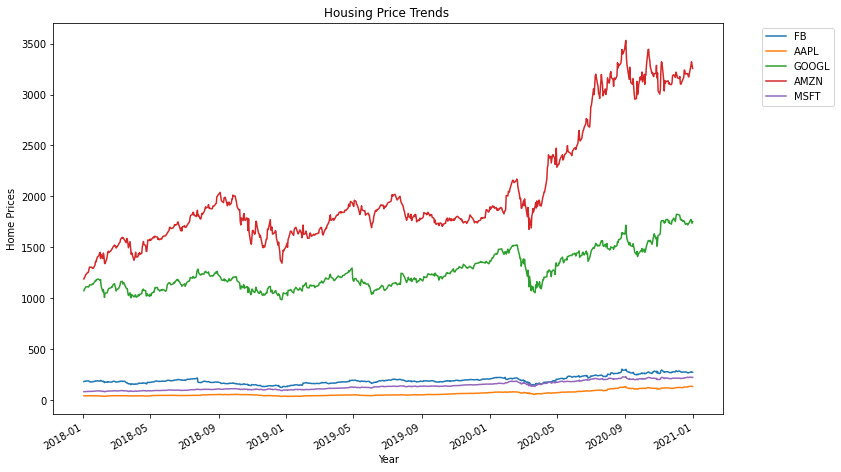

In [46]:
df_1.plot(figsize=(12,8))
plt.title("Housing Price Trends ")
#plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
plt.xlabel('Year')
plt.ylabel('Home Prices')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

In [3]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
df = web.DataReader('DAL', data_source='yahoo', start='2016-01-01', end='2021-1-11') 

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,49.419998,48.299999,49.419998,48.660000,12323200.0,44.223190
2016-01-05,49.750000,47.040001,49.310001,48.570000,14557200.0,44.141399
2016-01-06,49.299999,47.630001,47.790001,48.930000,10375900.0,44.468582
2016-01-07,48.680000,46.740002,48.389999,47.000000,11301100.0,42.714558
2016-01-08,48.950001,46.490002,47.480000,46.610001,10850300.0,42.360115


In [5]:
df.shape

(1265, 6)

Text(0, 0.5, 'Close Price USD ($)')

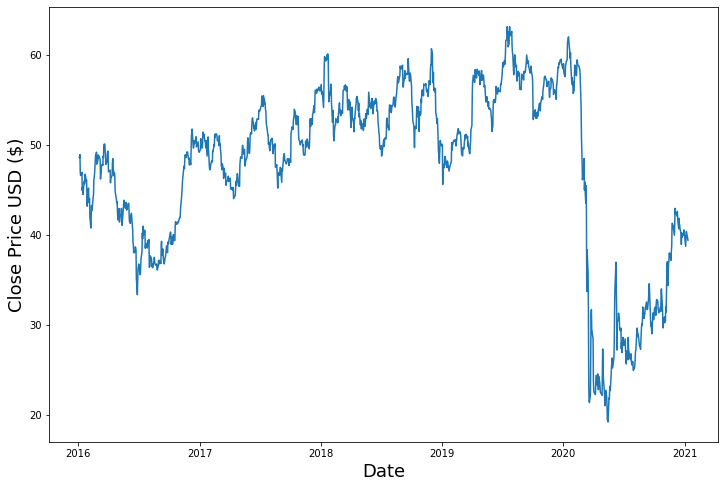

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [7]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()

In [8]:
dataset = df['Close']
# dataset = data.values

In [9]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [10]:
training_data_len, dataset, scaler, scaled_data = preprocessing(dataset, percentage=.8)

In [11]:
#training_data_len = int(np.round(len(dataset) * .8))

In [12]:
training_data_len

1012

In [13]:
#dataset = pd.DataFrame(dataset)

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [15]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = []    #dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        y_test.append(test_data[i,0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)    
        
    return X_train, X_test, y_train, y_test    

In [16]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [17]:
len(X_train[0])

60

In [18]:
#convert X_train and y_train to numpy array
#move above

#X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train

array([[[0.6702297 ],
        [0.66818284],
        [0.67637026],
        ...,
        [0.65976804],
        [0.68091883],
        [0.6854674 ]],

       [[0.66818284],
        [0.67637026],
        [0.63247669],
        ...,
        [0.68091883],
        [0.6854674 ],
        [0.67068456]],

       [[0.67637026],
        [0.63247669],
        [0.62360702],
        ...,
        [0.6854674 ],
        [0.67068456],
        [0.63270408]],

       ...,

       [[0.77120761],
        [0.76779624],
        [0.76870597],
        ...,
        [0.90629977],
        [0.88401186],
        [0.87491471]],

       [[0.76779624],
        [0.76870597],
        [0.78348873],
        ...,
        [0.88401186],
        [0.87491471],
        [0.87377759]],

       [[0.76870597],
        [0.78348873],
        [0.77279959],
        ...,
        [0.87491471],
        [0.87377759],
        [0.90197859]]])

In [20]:
X_train.shape

(952, 60, 1)

In [21]:

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
__________

In [23]:
#train the model
model.fit(X_train,y_train, epochs=50, batch_size=32 ) 

Epoch 1/50
952/952 [==============================] - 7s 8ms/step - loss: 0.0895
Epoch 2/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0113
Epoch 3/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0089
Epoch 4/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0076
Epoch 5/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0072
Epoch 6/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0058
Epoch 7/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0061
Epoch 8/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0060
Epoch 9/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0061
Epoch 10/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0054
Epoch 11/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0050
Epoch 12/50
952/952 [==============================] - 6s 6ms/step - loss: 0.0050
Epoch 13/50
952/952 [====

In [24]:
#convert data to a numpy array
X_test = np.array(X_test)

In [25]:
X_test.shape

(253, 60)

In [26]:
#number of rows, number of timeseteps, number of features
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [27]:
X_test.shape

(253, 60, 1)

In [28]:
#get models predicted price values for X_test dataset
#want predcitions to contain same values as y_test dataset once we inverse_transform
#getting predcitiosn off of X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [29]:
predictions

array([[57.408516],
       [57.52528 ],
       [57.789448],
       [58.28613 ],
       [58.96437 ],
       [59.72788 ],
       [60.47031 ],
       [60.963284],
       [61.09125 ],
       [60.940876],
       [60.508507],
       [59.745316],
       [58.82595 ],
       [57.860226],
       [57.009132],
       [56.26856 ],
       [55.692837],
       [55.450882],
       [55.619576],
       [56.065548],
       [56.6221  ],
       [57.14527 ],
       [57.62553 ],
       [58.095966],
       [58.50747 ],
       [58.804935],
       [58.956554],
       [58.9557  ],
       [58.824703],
       [58.57214 ],
       [57.973545],
       [56.836517],
       [55.22415 ],
       [53.30266 ],
       [51.210423],
       [49.26337 ],
       [47.617184],
       [46.534657],
       [45.825123],
       [45.441803],
       [45.16306 ],
       [45.037704],
       [44.87451 ],
       [44.03459 ],
       [42.801064],
       [41.2997  ],
       [39.484486],
       [37.035423],
       [34.018192],
       [30.755985],


In [30]:
#evaluate model w/RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

34.164054077489666

In [31]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])

In [32]:
train = dataset[:training_data_len]
valid = dataset[training_data_len:] #data from index training_data_len to 

In [33]:
len(predictions), len(valid)

(253, 253)

In [34]:
valid.reset_index(inplace=True)

In [35]:
valid.head()

,Date,Close
0,2020-01-10,59.240002
1,2020-01-13,59.490002
2,2020-01-14,61.450001
3,2020-01-15,61.619999
4,2020-01-16,61.880001


In [36]:
predictions.head()

,Predictions
0,57.408516
1,57.525280
2,57.789448
3,58.286129
4,58.964371


In [37]:
valid['Prediction'] = predictions['Predictions']

In [38]:
valid1 = valid.set_index('Date')

In [39]:
valid1.head()

,Close,Prediction
Date,,
2020-01-10,59.240002,57.408516
2020-01-13,59.490002,57.525280
2020-01-14,61.450001,57.789448
2020-01-15,61.619999,58.286129
2020-01-16,61.880001,58.964371


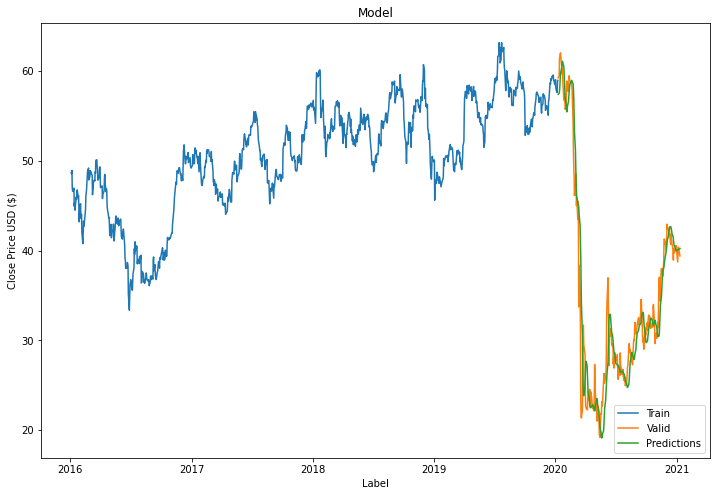

In [40]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be
"""

# train = dataset[:training_data_len]
# valid = dataset[training_data_len:] #data from index training_data_len to 
# valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Label')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
plt.plot(valid1['Close'])
plt.plot(valid1['Prediction'])
# #valid[['Close','Predictions']].plot()
plt.legend(['Train','Valid','Predictions'],loc='lower right')

In [41]:
dataset.tail()

,Close
Date,
2021-01-05,39.549999
2021-01-06,40.380001
2021-01-07,40.230000
2021-01-08,40.020000
2021-01-11,39.410000


In [42]:
"""
predict closing price fo apple stock for 12/18/2019

get the quote
"""
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #realreate empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predcited scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price                    

In [43]:
get_quote(dataset)

array([[40.261333]], dtype=float32)